# Regression Tree


In questa esercitazione si implementa un modello `DecisionTreeRegressor` per predire il target continuo __tip_amount__ sulla base delle informazioni contenute nel dataset `yellow-tripdata.csv`, subset del dataset pubblico disponibile su [TLC Dataset](https:/https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page/) (all rights reserved by Taxi & Limousine Commission (TLC), City of New York).


In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Analisi del dataset

In [2]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data.sample(5)

# Ogni riga rappresenta una corsa di taxi

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
18838,2,2,17.71,2,1,132,164,1,70.0,0.5,6.94,1,16.19
21404,2,2,17.15,2,1,132,164,1,70.0,0.5,6.94,1,10.00
9768,2,1,18.78,2,1,132,249,1,70.0,0.5,6.94,1,16.19
40946,2,1,17.53,2,1,132,229,1,70.0,0.5,6.94,1,16.19
16828,2,2,17.01,2,1,132,162,1,70.0,0.5,6.94,1,16.19


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               41202 non-null  int64  
 1   passenger_count        41202 non-null  int64  
 2   trip_distance          41202 non-null  float64
 3   RatecodeID             41202 non-null  int64  
 4   store_and_fwd_flag     41202 non-null  int64  
 5   PULocationID           41202 non-null  int64  
 6   DOLocationID           41202 non-null  int64  
 7   payment_type           41202 non-null  int64  
 8   fare_amount            41202 non-null  float64
 9   mta_tax                41202 non-null  float64
 10  tolls_amount           41202 non-null  float64
 11  improvement_surcharge  41202 non-null  int64  
 12  tip_amount             41202 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


<Axes: >

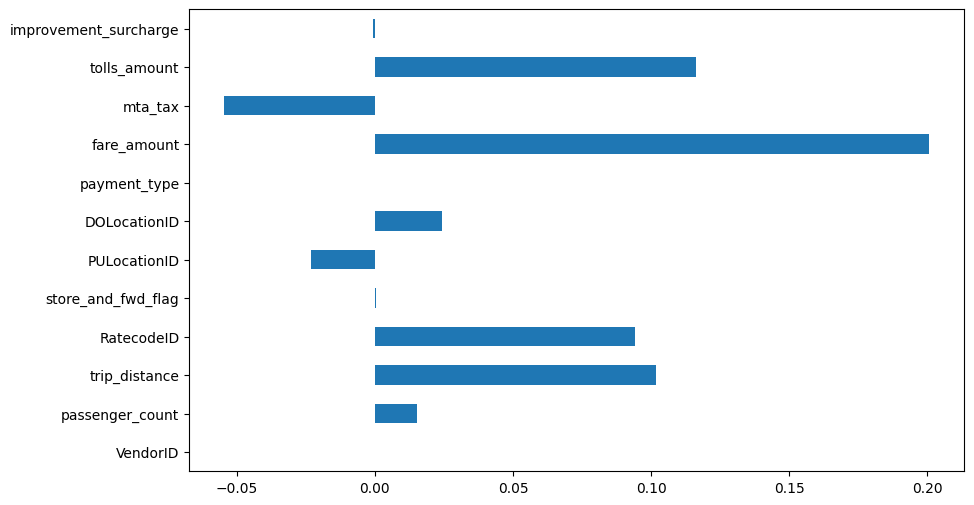

In [4]:
# Correlazione delle variabili con il target

correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

Si vede che le features `payment_type`, `VendorID`, `store_and_fwd_flag` and `improvement_surcharge` sono poco correlate con il target.


## Preprocessing

In [7]:
y = raw_data[['tip_amount']].values.astype('float32')  # estrazione del target

proc_data = raw_data.drop(['tip_amount'], axis=1)
X = proc_data.values
X = normalize(X, axis=1, norm='l1', copy=False)  # normalizzazione delle features

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=42)

## Definizione del modello di regressione

 `DecisionTreeRegressor` ha due parametri chiave:

- `criterion`: funzione per valutare l'errore, come 'squared_error';

- `max_depth`: profondità massima che l'albero può raggiungere;


In [8]:
dt_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8, random_state=35)
dt_reg.fit(X_trainset, y_trainset)  # addestramento

DecisionTreeRegressor(max_depth=8, random_state=35)

### Valutazione del modello


In [10]:
y_pred = dt_reg.predict(X_testset)  # predizioni

mse_score = mean_squared_error(y_testset, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_testset,y_testset)
print('R^2 score : {0:.3f}'.format(r2_score))

# Per una buona regressione si richiede un R^2 alto e una mse bassa

MSE score : 24.555
R^2 score : 0.028


### Cosa succede variando il valore di `max_depth`?

max_depth = 1 	 train mse: 24.81 	 test mse: 24.81
max_depth = 1 	 train R^2: 0.02 	 test R^2: 0.02


max_depth = 2 	 train mse: 24.55 	 test mse: 24.60
max_depth = 2 	 train R^2: 0.03 	 test R^2: 0.03


max_depth = 3 	 train mse: 24.33 	 test mse: 24.56
max_depth = 3 	 train R^2: 0.04 	 test R^2: 0.03


max_depth = 4 	 train mse: 24.16 	 test mse: 24.41
max_depth = 4 	 train R^2: 0.05 	 test R^2: 0.03


max_depth = 5 	 train mse: 24.01 	 test mse: 24.46
max_depth = 5 	 train R^2: 0.05 	 test R^2: 0.03


max_depth = 6 	 train mse: 23.84 	 test mse: 24.56
max_depth = 6 	 train R^2: 0.06 	 test R^2: 0.03


max_depth = 7 	 train mse: 23.57 	 test mse: 24.82
max_depth = 7 	 train R^2: 0.07 	 test R^2: 0.02


max_depth = 8 	 train mse: 23.23 	 test mse: 24.55
max_depth = 8 	 train R^2: 0.08 	 test R^2: 0.03


max_depth = 9 	 train mse: 22.79 	 test mse: 25.45
max_depth = 9 	 train R^2: 0.10 	 test R^2: -0.01


max_depth = 10 	 train mse: 22.37 	 test mse: 25.94
max_depth = 10 	 train R^2: 0

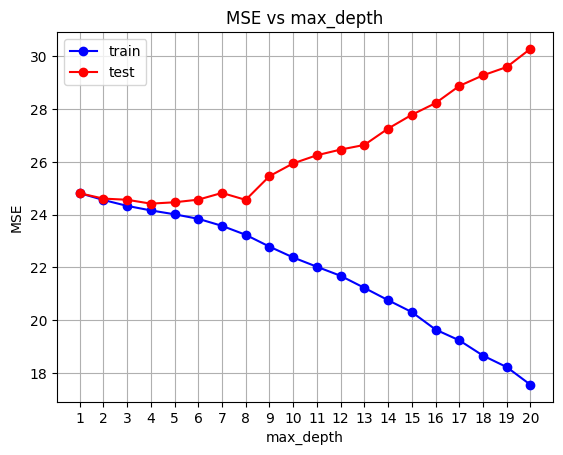

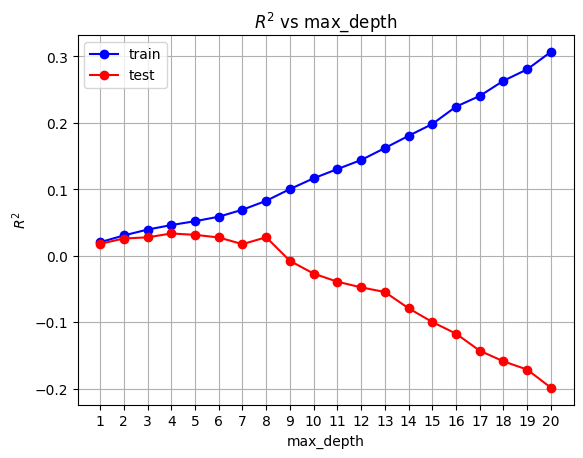

In [11]:
# Faccio un loop per vedere come variano le performance in base a max_depth e visualizzare eventuale overfitting
max_depths = np.linspace(1, 20, 20).astype('int')
criterion = 'squared_error'
hist_train_mse = []
hist_test_mse = []
hist_train_R2 = []
hist_test_R2 = []

for i, max_depth in enumerate(max_depths):
  model = DecisionTreeRegressor(criterion= criterion, max_depth = max_depth, random_state = 35)
  model.fit(X_trainset, y_trainset)
  model_pred_train = model.predict(X_trainset)
  model_pred_test = model.predict(X_testset)
  print(f"max_depth = {max_depth} \t train mse: {mean_squared_error(y_trainset, model_pred_train):.2f} \t test mse: {mean_squared_error(y_testset, model_pred_test):.2f}")
  print(f"max_depth = {max_depth} \t train R^2: {model.score(X_trainset, y_trainset):.2f} \t test R^2: {model.score(X_testset, y_testset):.2f}")
  print('\n')
  hist_train_mse.append(mean_squared_error(y_trainset, model_pred_train))
  hist_test_mse.append(mean_squared_error(y_testset, model_pred_test))

  hist_train_R2.append(model.score(X_trainset, y_trainset))
  hist_test_R2.append(model.score(X_testset, y_testset))

plt.plot(max_depths, hist_train_mse, c='b', marker='o', label='train')
plt.plot(max_depths, hist_test_mse, c='r', marker='o', label='test')
plt.legend()
plt.title('MSE vs max_depth')
plt.xticks(max_depths)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.grid()
plt.show()

plt.plot(max_depths, hist_train_R2, c='b', marker='o', label='train')
plt.plot(max_depths, hist_test_R2, c='r', marker='o', label='test')
plt.legend()
plt.title(r'$R^2$ vs max_depth')
plt.xticks(max_depths)
plt.xlabel('max_depth')
plt.ylabel(r'$R^2$')
plt.grid()

In questo caso il valore `max_depth = 4` sembra dare le prestazioni migliori, mentre per valori maggiori di sette è evidente l'overfitting del modello.

## Rimozione delle features poco correlate con il target

Si vuole vedere come questa rimozione influisce sulla mse e su $R^2$ score.




,tip_amount
trip_distance,0.101819
tolls_amount,0.116172
fare_amount,0.200638


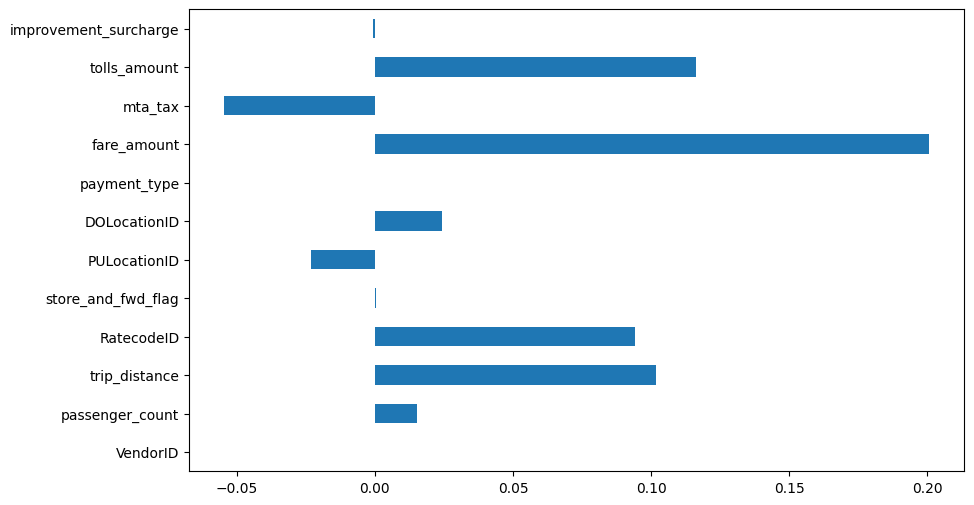

In [14]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(10, 6))

top_features = correlation_values.sort_values().dropna()[-3:]
top_features

In [18]:
# payment_type, VendorID, store_and_fwd_flag and improvement_surcharge sono poco correlate con tip_amount
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
features = raw_data.drop(['tip_amount', 'payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)

y = raw_data[['tip_amount']].values.astype('float32')  # estrazione target

proc_data = features
X = proc_data.values
X = normalize(X, axis=1, norm='l1', copy=False)

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth = 1 	 train mse: 24.81 	 test mse: 24.82
max_depth = 1 	 train R^2: 0.02 	 test R^2: 0.02


max_depth = 2 	 train mse: 24.55 	 test mse: 24.61
max_depth = 2 	 train R^2: 0.03 	 test R^2: 0.03


max_depth = 3 	 train mse: 24.33 	 test mse: 24.62
max_depth = 3 	 train R^2: 0.04 	 test R^2: 0.03


max_depth = 4 	 train mse: 24.12 	 test mse: 24.47
max_depth = 4 	 train R^2: 0.05 	 test R^2: 0.03


max_depth = 5 	 train mse: 23.97 	 test mse: 24.54
max_depth = 5 	 train R^2: 0.05 	 test R^2: 0.03


max_depth = 6 	 train mse: 23.78 	 test mse: 24.63
max_depth = 6 	 train R^2: 0.06 	 test R^2: 0.02


max_depth = 7 	 train mse: 23.50 	 test mse: 24.92
max_depth = 7 	 train R^2: 0.07 	 test R^2: 0.01


max_depth = 8 	 train mse: 23.17 	 test mse: 24.71
max_depth = 8 	 train R^2: 0.08 	 test R^2: 0.02


max_depth = 9 	 train mse: 22.65 	 test mse: 25.56
max_depth = 9 	 train R^2: 0.11 	 test R^2: -0.01


max_depth = 10 	 train mse: 22.40 	 test mse: 25.69
max_depth = 10 	 train R^2: 0

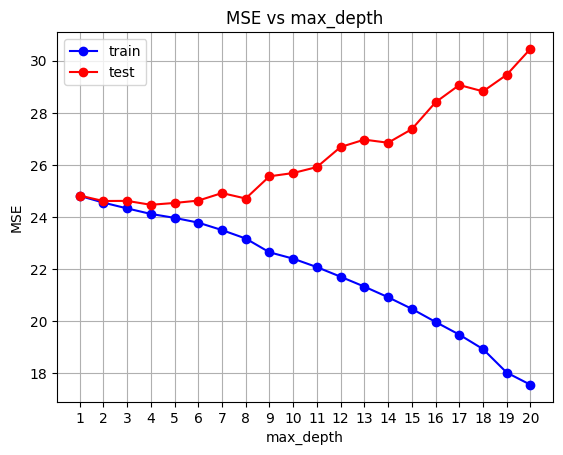

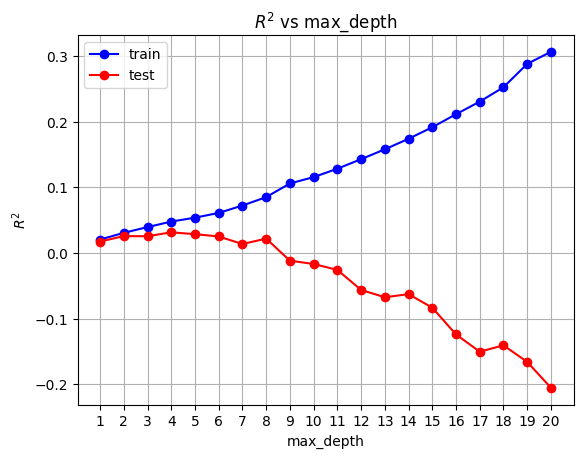

In [19]:
# Faccio un loop per vedere come variano le performance in base a max_depth e visualizzare eventuale overfitting
max_depths = np.linspace(1, 20, 20).astype('int')
criterion = 'squared_error'
hist_train_mse = []
hist_test_mse = []
hist_train_R2 = []
hist_test_R2 = []

for i, max_depth in enumerate(max_depths):
  model = DecisionTreeRegressor(criterion= criterion, max_depth = max_depth, random_state = 35)
  model.fit(X_trainset, y_trainset)
  model_pred_train = model.predict(X_trainset)
  model_pred_test = model.predict(X_testset)
  print(f"max_depth = {max_depth} \t train mse: {mean_squared_error(y_trainset, model_pred_train):.2f} \t test mse: {mean_squared_error(y_testset, model_pred_test):.2f}")
  print(f"max_depth = {max_depth} \t train R^2: {model.score(X_trainset, y_trainset):.2f} \t test R^2: {model.score(X_testset, y_testset):.2f}")
  print('\n')
  hist_train_mse.append(mean_squared_error(y_trainset, model_pred_train))
  hist_test_mse.append(mean_squared_error(y_testset, model_pred_test))

  hist_train_R2.append(model.score(X_trainset, y_trainset))
  hist_test_R2.append(model.score(X_testset, y_testset))

# Stampo il miglior max_depth in base al valore della mse
# O - in maniera equivalente - dove R^2 è maggiore
min_test_mse = np.array(hist_test_mse).min()
best_depth_max_index = np.where(hist_test_mse == min_test_mse)
best_depth_max = max_depths[best_depth_max_index]
print(f'Best max_depth = {best_depth_max[0]} with test mse: {min_test_mse:.2f}')

plt.plot(max_depths, hist_train_mse, c='b', marker='o', label='train')
plt.plot(max_depths, hist_test_mse, c='r', marker='o', label='test')
plt.legend()
plt.title('MSE vs max_depth')
plt.xticks(max_depths)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.grid()
plt.show()

plt.plot(max_depths, hist_train_R2, c='b', marker='o', label='train')
plt.plot(max_depths, hist_test_R2, c='r', marker='o', label='test')
plt.legend()
plt.title(r'$R^2$ vs max_depth')
plt.xticks(max_depths)
plt.xlabel('max_depth')
plt.ylabel(r'$R^2$')
plt.grid()

Anche in questo caso la scelta `max_depth = 4` sembra la migliore per il dataset in questione e anche togliendo le features poco correlate con la variabile target non si registrano miglioramenti nelle prestazioni del modello.